In [209]:
import urllib.request
import json

count = 100
owner_id = -25232578
token = 'c2bff29ec2bff29ec2bff29e68c2d6303acc2bfc2bff2\
9e9e17800d29762b8017da70c3'
posts_num = []
texts = []
dates = []

for i in range(0, 300, 100):
    request = 'https://api.vk.com/method/wall.get?owner_\
    id=%d&offset=%d&count=%d&v=5.92&access_token=%s' % (owner_id, i, count, token)
    req = urllib.request.Request(request)
    response = urllib.request.urlopen(req).read().decode('utf-8')
    data = json.loads(response)
    for j in range(len(data['response']['items'])):
        posts_num.append(data['response']['items'][j]['id'])  # id –ø–æ—Å—Ç–æ–≤
        texts.append(data['response']['items'][j]['text'])  # —Ç–µ–∫—Å—Ç—ã –ø–æ—Å—Ç–æ–≤
        dates.append(data['response']['items'][j]['date'])  # –¥–∞—Ç–∞ –ø—É–±–ª–∏–∫–∞—Ü–∏–∏
        
print(posts_num[:50])

[6698617, 6698514, 6698380, 6698257, 6698122, 6698028, 6697888, 6697748, 6697672, 6697575, 6697460, 6697264, 6697011, 6696712, 6696667, 6696573, 6696546, 6696467, 6696056, 6695748, 6695592, 6695409, 6695079, 6694661, 6694537, 6693926, 6693841, 6693676, 6693565, 6693538, 6693337, 6693280, 6693210, 6693114, 6692993, 6692911, 6692844, 6692791, 6692724, 6692666, 6692618, 6692578, 6692509, 6692443, 6692397, 6692337, 6692266, 6692220, 6692176, 6692099]


In [210]:
posts = {}

for i in range(len(posts_num)):
    posts[posts_num[i]] = [texts[i], dates[i]]

In [212]:
comments = {}

for post in posts_num:
    text_comment = []
    ids = []
    for i in range(0, 200, 100):
        request = 'https://api.vk.com/method/wall.getComments?\
        owner_id=%d&post_id=%d&offset=%d&count=%d&v=5.92\
        &access_token=%s' % (owner_id, post, i, count, token)
        req = urllib.request.Request(request)
        response = urllib.request.urlopen(req).read().decode('utf-8')
        data = json.loads(response)
        for j in range(len(data['response']['items'])):
            try:
                text_comment.append(data['response']['items'][j]['text'])
                ids.append(data['response']['items'][j]['from_id'])  
                # –ø—Ä–æ—Ñ–∏–ª–∏ –∫–æ–º–º–µ–Ω—Ç–∞—Ç–æ—Ä–æ–≤
            except KeyError:
                continue
    comments[post] = [text_comment, ids]

In [243]:
# –ü–æ–¥—Å—á–µ—Ç —Å–ª–æ–≤ –≤ –ø–æ—Å—Ç–∞—Ö –∏ –∫–æ–º–º–µ–Ω—Ç–∞—Ä–∏—è—Ö

sym = ".,?!‚Ä¶:;()[]-‚Äî‚Äì_|/\"'¬´¬ª*{}<>@#$%^&‚Ññ0123456789"

for key, value in posts.items():
    all_words_post = []
    all_lens_comment = []
    words = value[0].lower().strip().split()
    for word in words:
        new_word = word.strip(sym)
        if len(new_word) > 0:
            all_words_post.append(new_word)
    if len(value) < 3:
        value.append(len(all_words_post))
    else:
        value.pop(-1)
        value.append(len(all_words_post))
    com_len = 0
    for com in comments[key][0]:
        all_words_comment = []
        words = com.lower().strip().split()
        for word in words:
            new_word = word.strip(sym)
            if len(new_word) > 0:
                all_words_comment.append(new_word)
        all_lens_comment.append(len(all_words_comment))
        com_len += len(all_words_comment)
    if len(comments[key][0]) != 0:
        result = com_len//len(comments[key][0])
        if len(comments[key]) < 3:
            comments[key].append(result)
            comments[key].append(all_lens_comment)
        else:
            comments[key].pop(-1)
            comments[key].append(result)
            comments[key].append(all_lens_comment)
    else:
        comments[key].append(0)
        comments[key].append([])

In [220]:
x = []
y = []

for key, value in posts.items():
    x.append(value[2])
    y.append(comments[key][2])

In [221]:
new = {}

for i in range(len(x)):
    if x[i] not in new:
        new[x[i]] = list(str(y[i]))
    else:
        new[x[i]].append(str(y[i]))

In [222]:
for key, value in new.items():
    sum = 0
    for val in value:
        sum += int(val)
    res = sum/len(value)
    new[key] = res

In [223]:
import matplotlib.pyplot as plt
import seaborn

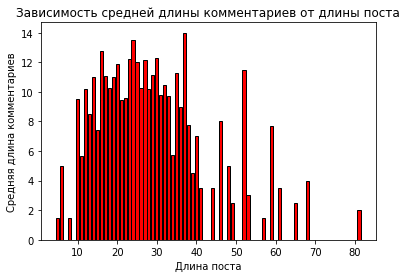

In [224]:
title = '–ó–∞–≤–∏—Å–∏–º–æ—Å—Ç—å —Å—Ä–µ–¥–Ω–µ–π –¥–ª–∏–Ω—ã –∫–æ–º–º–µ–Ω—Ç–∞—Ä–∏–µ–≤ –æ—Ç –¥–ª–∏–Ω—ã –ø–æ—Å—Ç–∞'
plt.bar(new.keys(), new.values(), color='red', edgecolor='k')
plt.title(title)
plt.xlabel('–î–ª–∏–Ω–∞ –ø–æ—Å—Ç–∞')
plt.ylabel('–°—Ä–µ–¥–Ω—è—è –¥–ª–∏–Ω–∞ –∫–æ–º–º–µ–Ω—Ç–∞—Ä–∏–µ–≤')
plt.savefig(title)

plt.show()

In [225]:
import time

for key, value in posts.items():
    value[1] = list(time.localtime(value[1]))

In [227]:
import os

filename = 'All_texts.txt'

try:
    os.remove(filename)
    f = open(filename, 'a+', encoding='utf-8')
except:
    f = open(filename, 'a+', encoding='utf-8')

for key, value in posts.items():
    print('–ü–æ—Å—Ç:\n' + value[0] + '\n', file=f)
    print('–ö–æ–º–º–µ–Ω—Ç–∞—Ä–∏–∏:\n' + '\n'.join(comments[key][0]) + '\n', file=f)

f.close()

os.system('mystem.exe -ld ' + ' All_texts.txt' + ' All_texts_mystem.txt')

0

In [228]:
wd_vs_len = {}
hour_vs_len = {}

for value in posts.values():
    if value[1][6] not in wd_vs_len:
        wd_vs_len[value[1][6]] = []
        wd_vs_len[value[1][6]].append(str(value[-1]))
    else:
        wd_vs_len[value[1][6]].append(str(value[-1]))
    if value[1][3] not in hour_vs_len:
        hour_vs_len[value[1][3]] = []
        hour_vs_len[value[1][3]].append(str(value[-1]))
    else:
        hour_vs_len[value[1][3]].append(str(value[-1]))

In [230]:
x1 = []
y1 = []

x2 = []
y2 = []

for key, value in wd_vs_len.items():
    x1.append(key)
    y1.append(value)

for key, value in hour_vs_len.items():
    x2.append(key)
    y2.append(value)

In [231]:
new1 = {}

for i in range(len(x1)):
    if x1[i] not in new1:
        new1[x1[i]] = y1[i]
    else:
        new1[x1[i]].append(y1[i])
        
for key, value in new1.items():
    sum = 0
    for val in value:
        sum += int(val)
    res = sum/len(value)
    new1[key] = res

In [232]:
new2 = {}

for i in range(len(x2)):
    if x2[i] not in new2:
        new2[x2[i]] = y2[i]
    else:
        new2[x2[i]].append(y2[i])
        
for key, value in new2.items():
    sum = 0
    for val in value:
        sum += int(val)
    res = sum/len(value)
    new2[key] = res

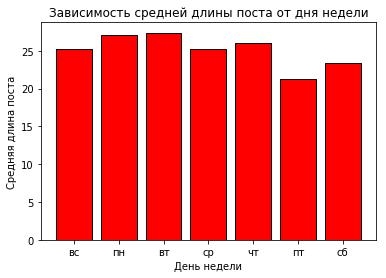

In [297]:
title = '–ó–∞–≤–∏—Å–∏–º–æ—Å—Ç—å —Å—Ä–µ–¥–Ω–µ–π –¥–ª–∏–Ω—ã –ø–æ—Å—Ç–∞ –æ—Ç –¥–Ω—è –Ω–µ–¥–µ–ª–∏'
plt.bar(new1.keys(), new1.values(), color='red', edgecolor='k')
plt.title(title)
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['–≤—Å', '–ø–Ω', '–≤—Ç', '—Å—Ä', '—á—Ç', '–ø—Ç', '—Å–±'])
plt.xlabel('–î–µ–Ω—å –Ω–µ–¥–µ–ª–∏')
plt.ylabel('–°—Ä–µ–¥–Ω—è—è –¥–ª–∏–Ω–∞ –ø–æ—Å—Ç–∞')
plt.savefig(title)

plt.show()

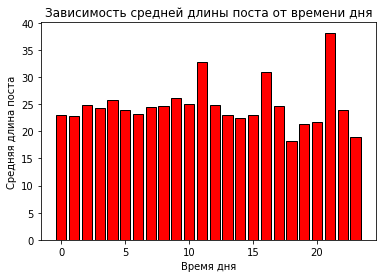

In [298]:
title = '–ó–∞–≤–∏—Å–∏–º–æ—Å—Ç—å —Å—Ä–µ–¥–Ω–µ–π –¥–ª–∏–Ω—ã –ø–æ—Å—Ç–∞ –æ—Ç –≤—Ä–µ–º–µ–Ω–∏ –¥–Ω—è'
plt.bar(new2.keys(), new2.values(), color='red', edgecolor='k')
plt.title(title)
plt.xlabel('–í—Ä–µ–º—è –¥–Ω—è')
plt.ylabel('–°—Ä–µ–¥–Ω—è—è –¥–ª–∏–Ω–∞ –ø–æ—Å—Ç–∞')
plt.savefig(title)

plt.show()

In [237]:
c = 0
keys = []

for key,value in comments.items():
    c += len(value[0])
    if c < 150:
        keys.append(key)
    else:
        break

In [246]:
for key in keys:
    value = comments[key]
    try:
        value.pop(4)
        value.append([])
    except:
        value.append([])
    for i in range(len(value[0])):
        if str(value[1][i])[0] != '-':
            request = 'https://api.vk.com/method/users.get?\
            user_ids=%s&fields=sex,city,has_photo&v=5.92&\
            access_token=%s' % (value[1][i], token)
            req = urllib.request.Request(request)
            response = urllib.request.urlopen(req).read().decode('utf-8')
            data = json.loads(response)
            try:
                data['response'][0]['city']['title']
                value[4].append([data['response'][0]['sex'],\
                                 data['response'][0]['city']['title'],
                                 data['response'][0]['has_photo']])
            except:
                value[4].append([data['response'][0]\
                                 ['sex'], 'No city', \
                                 data['response'][0]['has_photo']])
        else:
            value[4].append([])

In [272]:
cities = {}
sexs = {}
has_photos = {}

for key in keys:
    for i in range(len(comments[key][0])):
        if comments[key][-1][i][0] not in sexs:
            sexs[comments[key][-1][i][0]] = [comments[key][-2][i]]
        else:
            sexs[comments[key][-1][i][0]].append(comments[key][-2][i])
        if comments[key][-1][i][1] not in cities:
            cities[comments[key][-1][i][1]] = [comments[key][-2][i]]
        else:
            cities[comments[key][-1][i][1]].append(comments[key][-2][i])
        if comments[key][-1][i][2] not in has_photos:
            has_photos[comments[key][-1][i][2]] = [comments[key][-2][i]]
        else:
            has_photos[comments[key][-1][i][2]].append(comments[key][-2][i])

In [276]:
for key, value in sexs.items():
    sum = 0
    for i in value:
        sum += i
    sexs[key] = sum/len(value)

for key, value in cities.items():
    sum = 0
    for i in value:
        sum += i
    cities[key] = sum/len(value)

for key, value in has_photos.items():
    sum = 0
    for i in value:
        sum += i
    has_photos[key] = sum/len(value)

–¢—Ä–∏ —Å–ª–µ–¥—É—é—â–∏—Ö –≥—Ä–∞—Ñ–∏–∫–∞ –º–æ–≥—É—Ç –æ–∫–∞–∑–∞—Ç—å—Å—è –Ω–µ –æ—Å–æ–±–æ —Ä–µ–ø—Ä–µ–∑–µ–Ω—Ç–∞—Ç–∏–≤–Ω—ã–º–∏, –ø–æ—Ç–æ–º—É —á—Ç–æ —Å–æ–æ—Ç–Ω–æ—à–µ–Ω–∏–µ –æ–±—ä–µ–∫—Ç–æ–≤ –≤ –∫–ª–∞—Å—Å–∞—Ö –Ω–µ —Ä–∞–≤–Ω–æ—Ü–µ–Ω–Ω–æ.

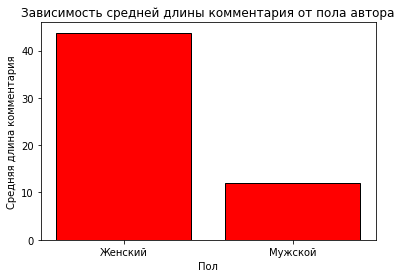

In [299]:
x = []
y = []

for key, value in sexs.items():
    x.append(key)
    y.append(value)

plt.bar(x, y, color='r', edgecolor='k')
plt.title('–ó–∞–≤–∏—Å–∏–º–æ—Å—Ç—å —Å—Ä–µ–¥–Ω–µ–π –¥–ª–∏–Ω—ã –∫–æ–º–º–µ–Ω—Ç–∞—Ä–∏—è –æ—Ç –ø–æ–ª–∞ –∞–≤—Ç–æ—Ä–∞')
plt.ylabel('–°—Ä–µ–¥–Ω—è—è –¥–ª–∏–Ω–∞ –∫–æ–º–º–µ–Ω—Ç–∞—Ä–∏—è')
plt.xlabel('–ü–æ–ª')
plt.xticks([1, 2], ['–ñ–µ–Ω—Å–∫–∏–π', '–ú—É–∂—Å–∫–æ–π'])
plt.savefig('–ó–∞–≤–∏—Å–∏–º–æ—Å—Ç—å —Å—Ä–µ–¥–Ω–µ–π –¥–ª–∏–Ω—ã –∫–æ–º–º–µ–Ω—Ç–∞—Ä–∏—è –æ—Ç –ø–æ–ª–∞ –∞–≤—Ç–æ—Ä–∞')

plt.show()

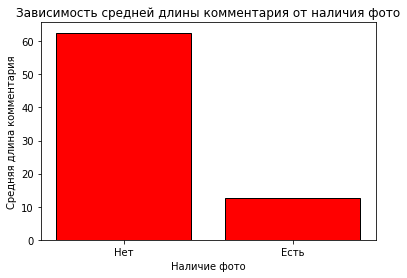

In [300]:
x = []
y = []

for key, value in has_photos.items():
    x.append(key)
    y.append(value)

plt.bar(x, y, color='r', edgecolor='k')
plt.title('–ó–∞–≤–∏—Å–∏–º–æ—Å—Ç—å —Å—Ä–µ–¥–Ω–µ–π –¥–ª–∏–Ω—ã –∫–æ–º–º–µ–Ω—Ç–∞—Ä–∏—è –æ—Ç –Ω–∞–ª–∏—á–∏—è —Ñ–æ—Ç–æ')
plt.ylabel('–°—Ä–µ–¥–Ω—è—è –¥–ª–∏–Ω–∞ –∫–æ–º–º–µ–Ω—Ç–∞—Ä–∏—è')
plt.xlabel('–ù–∞–ª–∏—á–∏–µ —Ñ–æ—Ç–æ')
plt.xticks([0, 1], ['–ù–µ—Ç', '–ï—Å—Ç—å'])
plt.savefig('–ó–∞–≤–∏—Å–∏–º–æ—Å—Ç—å —Å—Ä–µ–¥–Ω–µ–π –¥–ª–∏–Ω—ã –∫–æ–º–º–µ–Ω—Ç–∞—Ä–∏—è –æ—Ç –Ω–∞–ª–∏—á–∏—è —Ñ–æ—Ç–æ')

plt.show()

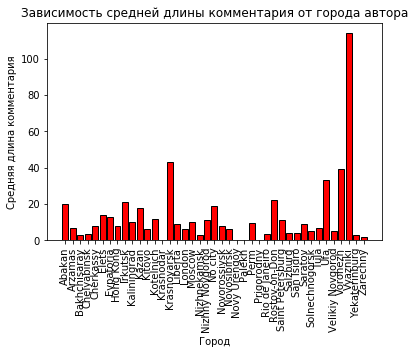

In [305]:
x = []
y = []

for key, value in sorted(cities.items()):
    x.append(key)
    y.append(value)

plt.bar(x, y, color='r', edgecolor='k')
plt.title('–ó–∞–≤–∏—Å–∏–º–æ—Å—Ç—å —Å—Ä–µ–¥–Ω–µ–π –¥–ª–∏–Ω—ã –∫–æ–º–º–µ–Ω—Ç–∞—Ä–∏—è –æ—Ç –≥–æ—Ä–æ–¥–∞ –∞–≤—Ç–æ—Ä–∞')
plt.ylabel('–°—Ä–µ–¥–Ω—è—è –¥–ª–∏–Ω–∞ –∫–æ–º–º–µ–Ω—Ç–∞—Ä–∏—è')
plt.xlabel('–ì–æ—Ä–æ–¥')
plt.xticks(rotation=90)
plt.savefig('–ó–∞–≤–∏—Å–∏–º–æ—Å—Ç—å —Å—Ä–µ–¥–Ω–µ–π –¥–ª–∏–Ω—ã –∫–æ–º–º–µ–Ω—Ç–∞—Ä–∏—è –æ—Ç\
–≥–æ—Ä–æ–¥–∞ –∞–≤—Ç–æ—Ä–∞', bbox_inches='tight')

plt.show()

In [173]:
stops = []

with open('rus_stopwords.txt', 'r', encoding='utf-8') as stop:
    for line in stop:
        stops.append(line.strip())

In [174]:
clean_text = []

sym = ".,?!‚Ä¶:;()[]-‚Äî‚Äì _|/\"'¬´¬ª*{}<>@#$%^&‚Ññ0123456789"

with open('All_texts.txt', 'r', encoding='utf-8') as f:
    text = f.readlines()
    for line in text:
        new_line = line.lower().strip(sym).split()
        for word in new_line:
            new_word = word.strip(sym)
            if len(new_word) > 0:
                clean_text.append(new_word)

In [175]:
clean = [word for word in clean_text if word not in stops]

In [177]:
clean_text_mystem = []

with open('All_texts_mystem.txt', 'r', encoding='utf-8') as t:
    text = t.read()
    text = text.lower().strip('{}').split('}{')
    for word in text:
        new_word = word.strip('?')
        clean_text_mystem.append(new_word)

In [178]:
clean_mystem = [word for word in clean_text_mystem if word not in stops]

In [179]:
freq = {}

for word in clean:
    if word in freq:
        freq[word] += 1
    else:
        freq[word] = 1

In [180]:
for word in sorted(freq, key=freq.get, reverse=True)[:30]:
    print(word, "\t", freq[word])

—Ä–æ—Å—Å–∏–∏ 	 478
–ª–µ—Ç 	 242
–ø—É—Ç–∏–Ω 	 228
–ø—Ä–æ—Å—Ç–æ 	 192
—É–∫—Ä–∞–∏–Ω—ã 	 173
—É–∫—Ä–∞–∏–Ω–µ 	 173
–ø–æ—Ä–æ—à–µ–Ω–∫–æ 	 171
—Ç–æ–∂–µ 	 170
—Ä—Ñ 	 166
–±–æ–ª—å—à–µ 	 163
—Å–µ–π—á–∞—Å 	 159
–≤–ª–∞—Å—Ç–∏ 	 157
–ª—É—á—à–µ 	 152
–≤–æ–æ–±—â–µ 	 152
–ª—é–¥–∏ 	 151
—Å—à–∞ 	 149
–¥–µ–Ω—å–≥–∏ 	 147
—Ä–æ—Å—Å–∏—è 	 147
–ø—É—Å—Ç—å 	 146
–ª—é–¥–µ–π 	 146
–Ω–∞—Ä–æ–¥ 	 142
–∑–µ–ª–µ–Ω—Å–∫–∏–π 	 141
—Å—Ç—Ä–∞–Ω—ã 	 137
–¥–∞–≤–Ω–æ 	 129
–≤—ã–±–æ—Ä—ã 	 125
—á–µ–ª–æ–≤–µ–∫ 	 123
–ø—Ä–µ–∑–∏–¥–µ–Ω—Ç 	 123
—Å—Ç—Ä–∞–Ω–µ 	 120
–ø—É—Ç–∏–Ω–∞ 	 115
—É–∫—Ä–∞–∏–Ω–∞ 	 114


In [181]:
freq2 = {}

for lemma in clean_mystem:
    if lemma in freq2:
        freq2[lemma] += 1
    else:
        freq2[lemma] = 1

In [182]:
for lemma in sorted(freq2, key=freq2.get, reverse=True)[:50]:
    print(lemma, "\t", freq2[lemma]) 

—Ä–æ—Å—Å–∏—è 	 747
—É–∫—Ä–∞–∏–Ω–∞ 	 589
—á–µ–ª–æ–≤–µ–∫ 	 564
–≥–æ–¥ 	 488
—Å—Ç—Ä–∞–Ω–∞ 	 468
ü§£ 	 463
–ø—É—Ç–∏–Ω 	 436
üòÇ 	 418
–∫–∞–∫–æ–π 	 353
–Ω–∞—Ä–æ–¥ 	 336
–ø—Ä–µ–∑–∏–¥–µ–Ω—Ç 	 322
–∑–µ–ª–µ–Ω—Å–∫–∏–π 	 306
–≤–ª–∞—Å—Ç—å 	 264
–¥–µ–Ω—å–≥–∏ 	 262
–≤—ã–±–æ—Ä—ã 	 246
–Ω–æ–≤—ã–π 	 243
—Ä–æ—Å—Å–∏–π—Å–∫–∏–π 	 230
–ø—Ä–æ—Å—Ç–æ 	 223
—Ö–æ—Ä–æ—à–æ 	 220
–¥–∞–≤–∞—Ç—å 	 217
–º–Ω–æ–≥–æ 	 210
–¥—Ä—É–≥–æ–π 	 205
—Å–∞–º—ã–π 	 205
—Å—Ç–∞–Ω–æ–≤–∏—Ç—å—Å—è 	 204
—Å–¥–µ–ª–∞—Ç—å 	 198
–ø–æ–Ω–∏–º–∞—Ç—å 	 186
–º–∏—Ä 	 185
–¥–µ–ª–æ 	 185
–ø–æ—Ä–æ—à–µ–Ω–∫–æ 	 184
–ø–µ–Ω—Å–∏—è 	 181
–∂–∏—Ç—å 	 181
—Ä—Ñ 	 178
—Ç–æ–∂–µ 	 175
—Ö–æ—Ä–æ—à–∏–π 	 173
–Ω–µ—Ñ—Ç—å 	 172
–≤—Ä–µ–º—è 	 168
–∂–∏–∑–Ω—å 	 167
—Å–µ–π—á–∞—Å 	 166
–ø–æ–ª—É—á–∞—Ç—å 	 161
–∑–Ω–∞—Ç—å 	 159
https 	 159
–ø—É—Å—Ç—å 	 158
—Ä—É—Å—Å–∫–∏–π 	 156
–≤–æ–æ–±—â–µ 	 154
—Å—à–∞ 	 153
üëç 	 152
–ø–∞—Å–ø–æ—Ä—Ç 	 152
–≤–æ–ø—Ä–æ—Å 	 149
–¥–æ–ª–∂–Ω—ã–π 	 145
–Ω–∞—á–∏–Ω–∞—Ç—å 	 143


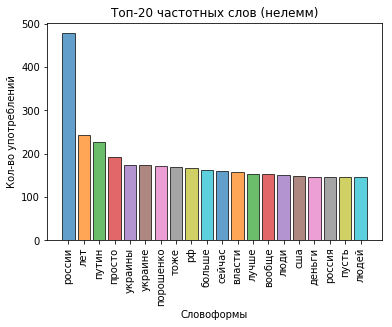

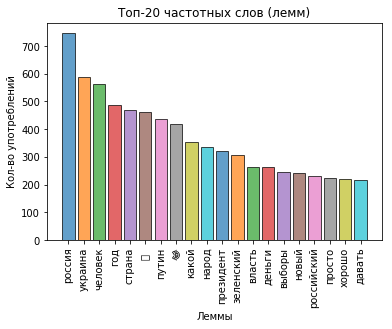

In [184]:
import matplotlib.pyplot as plt

words_plot = []
x = 1
for word in sorted(freq, key=freq.get, reverse=True)[:20]:
    words_plot.append(word)
    plt.bar(x, freq[word], alpha=0.7, edgecolor='k')
    x += 1
plt.xticks([i+1 for i in range(20)], words_plot, rotation=90)
plt.title("–¢–æ–ø-20 —á–∞—Å—Ç–æ—Ç–Ω—ã—Ö —Å–ª–æ–≤ (–Ω–µ–ª–µ–º–º)")
plt.ylabel('–ö–æ–ª-–≤–æ —É–ø–æ—Ç—Ä–µ–±–ª–µ–Ω–∏–π')
plt.xlabel('–°–ª–æ–≤–æ—Ñ–æ—Ä–º—ã')
plt.savefig("–¢–æ–ø-20 —á–∞—Å—Ç–æ—Ç–Ω—ã—Ö —Å–ª–æ–≤ (–Ω–µ–ª–µ–º–º)")
plt.show()

lemmas_plot = []
x = 1
for lemma in sorted(freq2, key=freq2.get, reverse=True)[:20]:
    lemmas_plot.append(lemma)
    plt.bar(x, freq2[lemma], alpha=0.7, edgecolor='k')
    x += 1
plt.xticks([i+1 for i in range(20)], lemmas_plot, rotation=90)
plt.title("–¢–æ–ø-20 —á–∞—Å—Ç–æ—Ç–Ω—ã—Ö —Å–ª–æ–≤ (–ª–µ–º–º)")
plt.ylabel('–ö–æ–ª-–≤–æ —É–ø–æ—Ç—Ä–µ–±–ª–µ–Ω–∏–π')
plt.xlabel('–õ–µ–º–º—ã')
plt.savefig("–¢–æ–ø-20 —á–∞—Å—Ç–æ—Ç–Ω—ã—Ö —Å–ª–æ–≤ (–ª–µ–º–º)")
plt.show()

–ö–æ–ª-–≤–æ —É–ø–æ—Ç—Ä–µ–±–ª–µ–Ω–∏–π "–†–æ—Å—Å–∏–∏" –≤–æ–∑—Ä–æ—Å–ª–æ, —Ç–∞–∫ –∫–∞–∫ —Å–ª–æ–≤–æ, –≤–∏–¥–∏–º–æ, —É–ø–æ—Ç—Ä–µ–±–ª—è–µ—Ç—Å—è –≤ —Ä–∞–∑–ª–∏—á–Ω—ã—Ö –ø–∞–¥–µ–∂–∞—Ö –≤ —Ç–µ–∫—Å—Ç–∞—Ö.
"–£–∫—Ä–∞–∏–Ω–∞" –∏ "—á–µ–ª–æ–≤–µ–∫" –æ–±–æ–≥–Ω–∞–ª–∏ "–≥–æ–¥–∞", –≤–∏–¥–∏–º–æ, –ø–æ —Ç–æ–π –∂–µ –ø—Ä–∏—á–∏–Ω–µ, –Ω–æ –∏ –ª–µ–º–º–∞ "–≥–æ–¥" –≤ –¥–≤–∞ —Ä–∞–∑–∞ —á–∞—â–µ –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è, —á–µ–º —Å–ª–æ–≤–æ—Ñ–æ—Ä–º–∞ "–ª–µ—Ç" (–≤–µ–¥—å –µ—Å—Ç—å —Ä–∞–∑–Ω—ã–µ –≤–∞—Ä–∏–∞—Ü–∏–∏ –≤—ã—Ä–∞–∂–µ–Ω–∏—è).

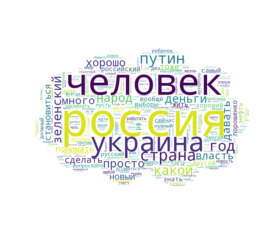

In [186]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud

text = ' '.join(clean_mystem)

comment_mask = np.array(Image.open("image_cloud.jpg"))

cloud = WordCloud(background_color="white", max_words=2000, mask=comment_mask)


cloud.generate(text)


plt.imshow(cloud, interpolation='bilinear')
plt.axis("off")
plt.show()


cloud.to_file("post_cloud.png")

In [306]:
comments

{6698617: [['?',
   '',
   '–ù–æ–≤–æ—Å—Ç—å –±–æ–º–±–∞',
   '–ï—Å–ª–∏ –≤ –ü—É—Ç–∏–Ω—Å–∫–æ–π –†–æ–∏—Å—Å–∏–∏ —á—Ç–æ-—Ç–æ —Ä–≤–∞–Ω—É–ª–æ- —ç—Ç–æ –≥–∞–∑ –≤–∑–æ—Ä–≤–∞–ª—Å—è –∏–ª–∏ —É—á–µ–Ω–∏—è —Å —Å–∞—Ö–∞—Ä–æ–º üòÅ',
   '–í–æ—Ç —Ç–∞–∫ –≤–æ—Ç\n–õ—é–¥–∏ –≥–∏–±–Ω—É—Ç –∑–∞ –º–µ—Ç–∞–ª',
   '–ú–æ–∂–µ—Ç –≤—Å–µ-—Ç–∞–∫–∏ –ê–≤—Ä–æ—Ä–∞ —Å—Ç—Ä–µ–ª—è–ª–∞?',
   '–†—è–¥–æ–º —à–∫–æ–ª–∞ –º–æ–µ–≥–æ —Ä–µ–±–µ–Ω–∫–∞... –ù—É –∏ –ª–∞–¥–Ω–æ, —Å–µ–≥–æ–¥–Ω—è –≤—ã—Ö–æ–¥–Ω–æ–π, –∏ –æ–Ω–∞ –µ–µ –∑–∞–∫–æ–Ω—á–∏–ª–∞ –≤ –ø—Ä–æ—à–ª–æ–º –≥–æ–¥—É',
   '–ü*–∑–¥–µ—Ü, —Å—Ç–æ–ª—å–∫–æ —É–±–ª—é–¥–∫–æ–≤ —Å —è–∑–≤–∏—Ç–µ–ª—å–Ω—ã–º–∏ –∫–æ–º–º–µ–Ω—Ç–∞—Ä–∏–∏. –õ–∏—à—å –±—ã –ø–æ–≥–ª—É–º–∏—Ç—å—Å—è, —á–µ—Ä—Ç–∏ —ë*–∞–Ω—ã–µü§¶\u200d‚ôÇÔ∏è',
   '–õ—é–¥–∏, –≤—ã –≤–æ–æ–±—â–µ –∞–¥–µ–∫–≤–∞—Ç–Ω—ã–µ —Ç–∞–∫–∏–µ –∫–æ–º–º–µ–Ω—Ç–∞—Ä–∏–∏ –ø–∏—Å–∞—Ç—å? –®—É—Ç–Ω–∏–∫–∏ –Ω–∞—à–ª–∏—Å—å..',
   '–≠–¢–û –†–£–•–ù–£–õ –ö–£–†–° –ê–ö–¶–ò–ô –†–û–°–°–ò–ô–°–ö–ò–• –ö–û–ú–ü–ê–ù–ò–ô –ù–ê –ù–¨–Æ –ô–û–†–°–ö–û–ô –§–û–ù–î–û–í–û–ô –ë–ò–†–ñ–ï',
   '–•–æ—Ä–æ—à–æ, —Ö–æ—Ç—å –Ω–µ —

In [330]:
import sqlite3

con = sqlite3.connect("info.db", check_same_thread=False)

cur = con.cursor()
cur.execute("CREATE TABLE IF NOT EXISTS new (post_id, type, text, "
            "year_post, month_post, day_post, hour_post, minute_post,"
            " id, sex, has_photo, city);")

for key, value in posts.items():
    cur.execute(
    "INSERT INTO new (post_id, type, text, "
            "year_post, month_post, day_post, \
            hour_post, minute_post,"
            " id, sex, has_photo, city) "
    "VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?);", (key,\
                    'post', value[0], value[1][0], value[1][1],\
                    value[1][2], value[1][3], value[1][4], \
                    '-', '-', '-', '-'))
    for i in range(len(comments[key][0])):
        cur.execute(
        "INSERT INTO new (post_id, type, text, "
                "year_post, month_post, day_post, \
                hour_post, minute_post,"
                " id, sex, has_photo, city) "
        "VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?);", (key,\
                    'comment', comments[key][0][i], '-',\
                    '-', '-', '-', '-', comments[key][1][i], \
                    str(comments[key][-1][i]), str(comments\
                    [key][-1][i]), str(comments[key][-1][i])))
    con.commit()

con.close()